In [3]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# ignorar warnings
warnings.filterwarnings('ignore')

In [2]:
# importando dados
iris = load_iris(as_frame=True)
data = iris.data
data['species'] = iris.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


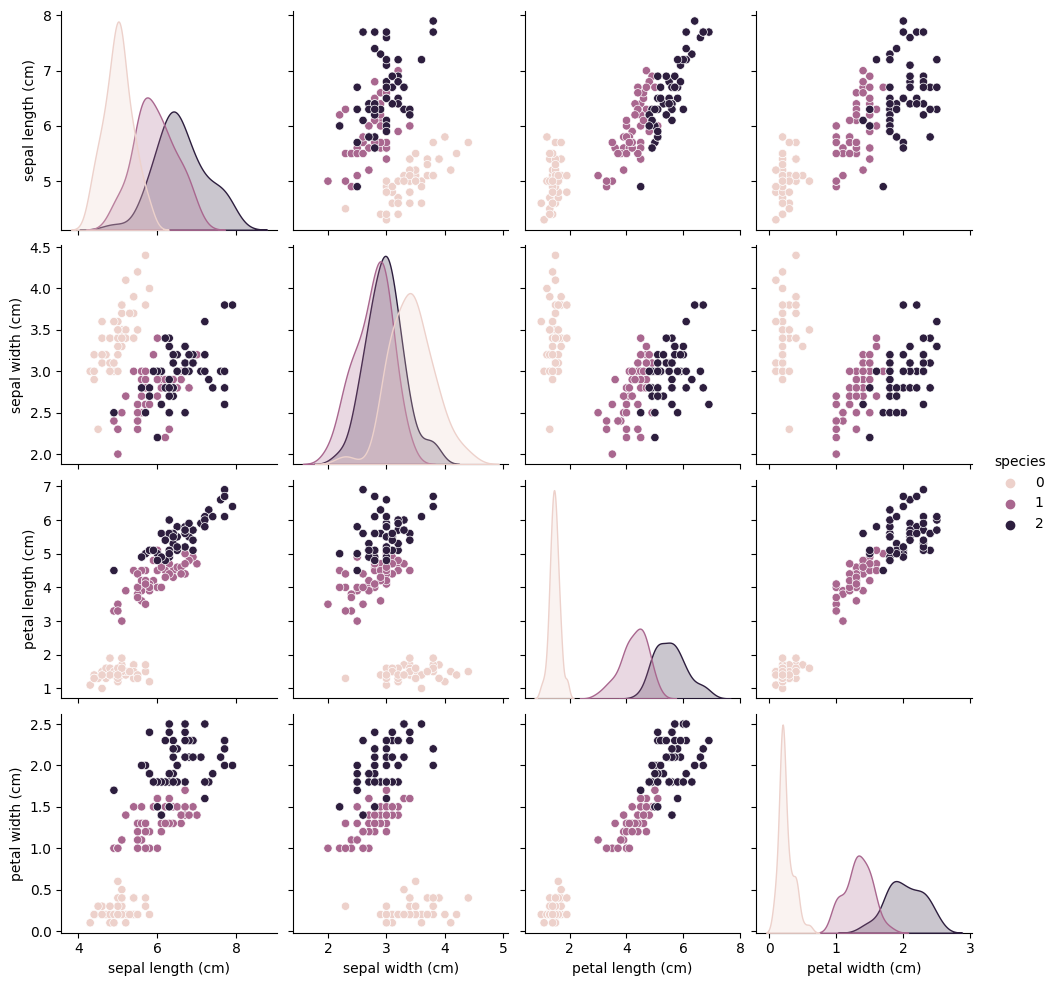

In [5]:
# vamos começar a clusterização de exemplo com um par
sns.pairplot(data, hue='species')

In [6]:
# amostrando colunas desejadas
x = data[['petal length (cm)', 'sepal width (cm)']]
x.head()

,petal length (cm),sepal width (cm)
0,1.4,3.5
1,1.4,3.0
2,1.3,3.2
3,1.5,3.1
4,1.4,3.6


In [7]:
# passo 1 do "pipeline" - padronização das amostras
x_std = StandardScaler().fit_transform(x)
x_std

array([[-1.34022653,  1.01900435],
       [-1.34022653, -0.13197948],
       [-1.39706395,  0.32841405],
       [-1.2833891 ,  0.09821729],
       [-1.34022653,  1.24920112],
       [-1.16971425,  1.93979142],
       [-1.34022653,  0.78880759],
       [-1.2833891 ,  0.78880759],
       [-1.34022653, -0.36217625],
       [-1.2833891 ,  0.09821729],
       [-1.2833891 ,  1.47939788],
       [-1.22655167,  0.78880759],
       [-1.34022653, -0.13197948],
       [-1.51073881, -0.13197948],
       [-1.45390138,  2.16998818],
       [-1.2833891 ,  3.09077525],
       [-1.39706395,  1.93979142],
       [-1.34022653,  1.01900435],
       [-1.16971425,  1.70959465],
       [-1.2833891 ,  1.70959465],
       [-1.16971425,  0.78880759],
       [-1.2833891 ,  1.47939788],
       [-1.56757623,  1.24920112],
       [-1.16971425,  0.55861082],
       [-1.05603939,  0.78880759],
       [-1.22655167, -0.13197948],
       [-1.22655167,  0.78880759],
       [-1.2833891 ,  1.01900435],
       [-1.34022653,

In [10]:
# aplicando o DBSCAN
def apply_DBSCAN(data, eps, min_points):

  # ajuste aos dados
  cluster = DBSCAN(eps=eps, min_samples=min_points).fit(data)

  # obter colunas de clusters
  labels = cluster.labels_

  # construir gráfico
  print(f'DBSCAN - eps = {eps} - min_pts = {min_points}')
  plt.figure(figsize=(12,7))
  sns.jointplot(x=data[:, 0], y=data[:, 1], hue = labels, palette = 'tab10')
  plt.show()

DBSCAN - eps = 0.01 - min_pts = 5


<Figure size 1200x700 with 0 Axes>

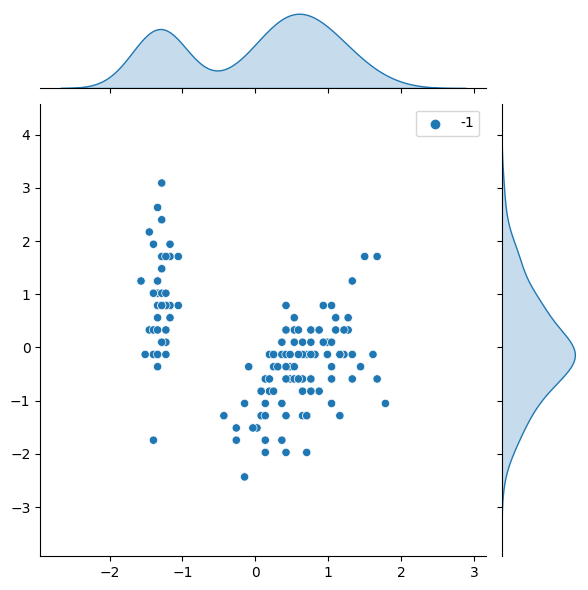

DBSCAN - eps = 0.1 - min_pts = 5


<Figure size 1200x700 with 0 Axes>

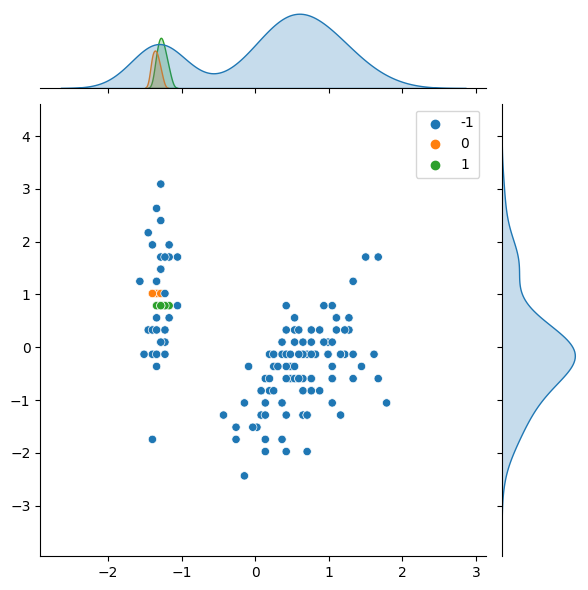

DBSCAN - eps = 1 - min_pts = 5


<Figure size 1200x700 with 0 Axes>

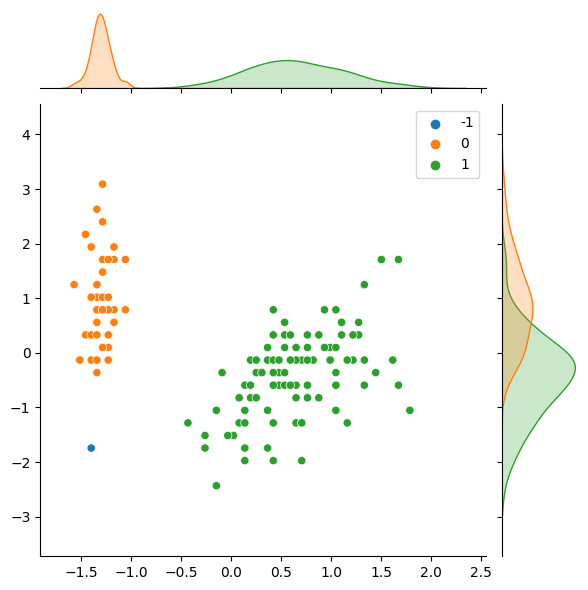

DBSCAN - eps = 10 - min_pts = 5


<Figure size 1200x700 with 0 Axes>

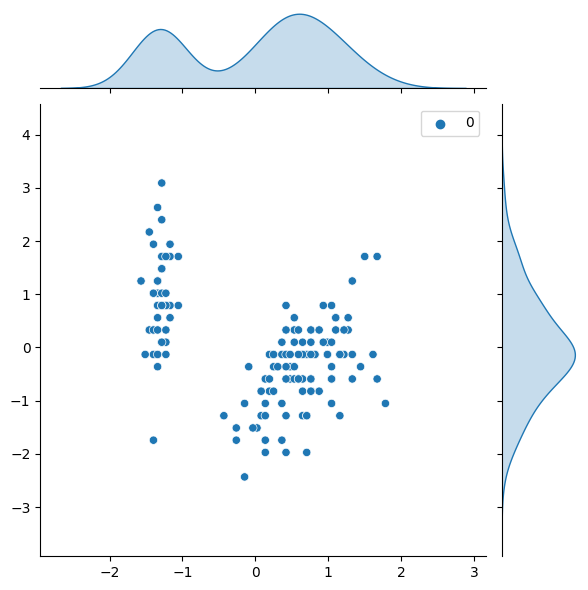

In [11]:
# analisando influência do eps
eps = [0.01, 0.1, 1, 10]

for e in eps:
  apply_DBSCAN(x_std, e, 5)

DBSCAN - eps = 1 - min_pts = 1


<Figure size 1200x700 with 0 Axes>

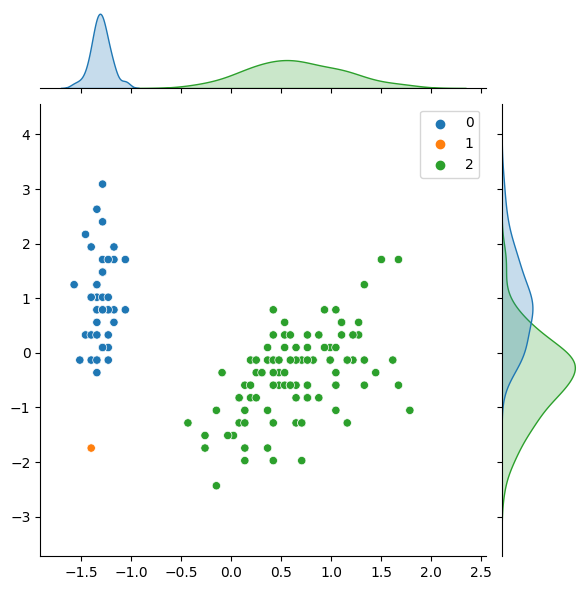

DBSCAN - eps = 1 - min_pts = 5


<Figure size 1200x700 with 0 Axes>

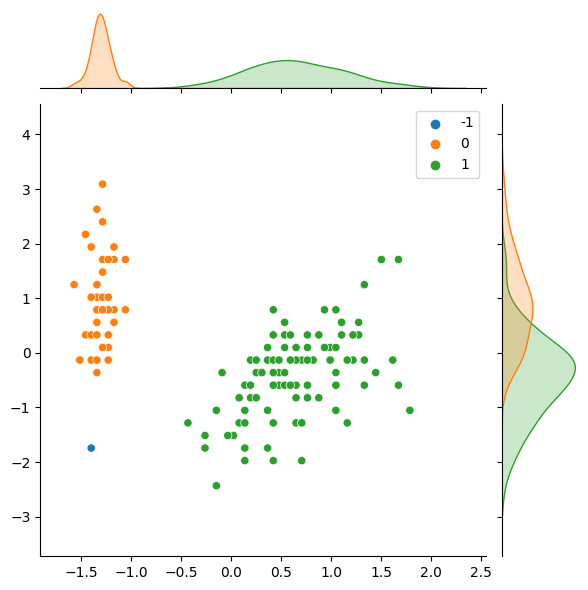

DBSCAN - eps = 1 - min_pts = 20


<Figure size 1200x700 with 0 Axes>

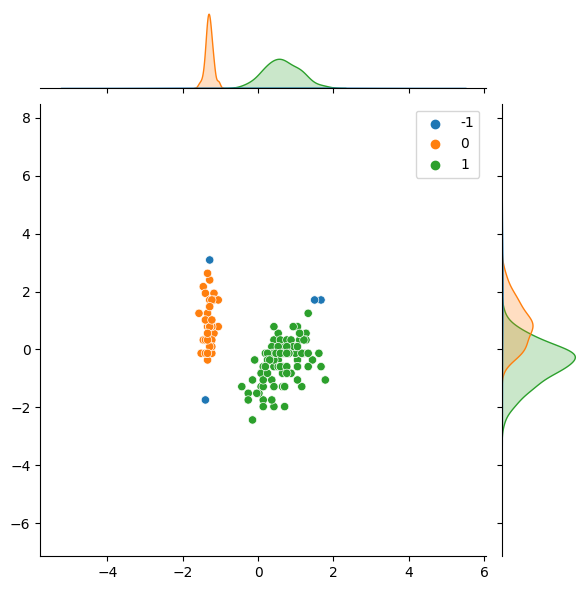

DBSCAN - eps = 1 - min_pts = 50


<Figure size 1200x700 with 0 Axes>

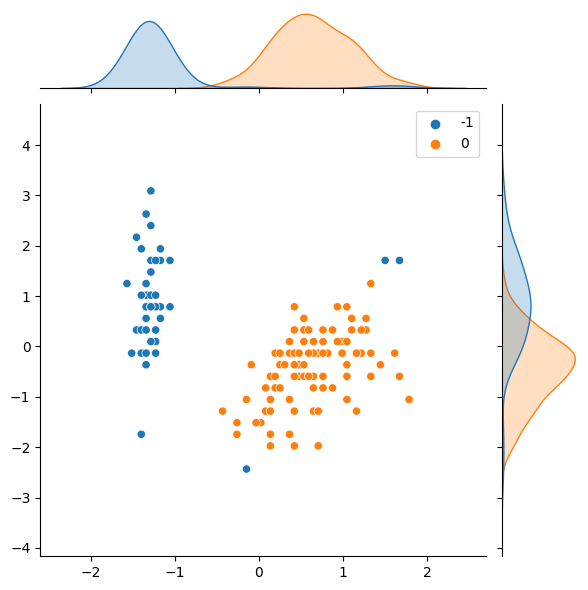

DBSCAN - eps = 1 - min_pts = 70


<Figure size 1200x700 with 0 Axes>

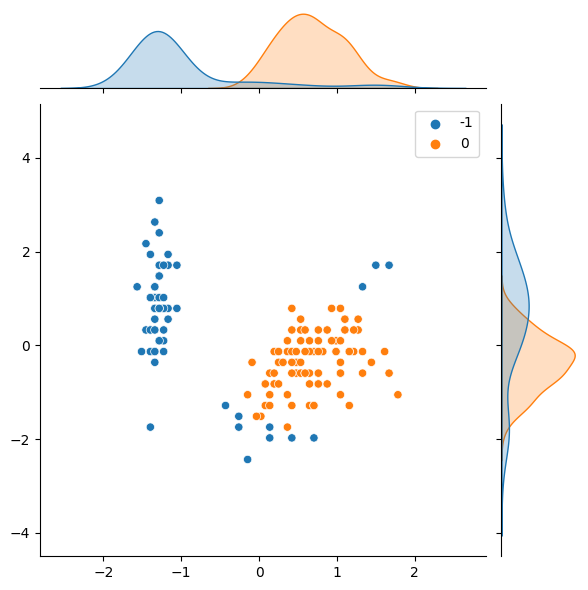

In [13]:
# analisando influência do min_points
min_points = [1, 5, 20, 50, 70]

for n in min_points:
  apply_DBSCAN(x_std, 1, n)